### Import all the necessary libraries

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [130]:
path_cwd = os.getcwd()

### Dataset "Economic Accounts for Agriculture" of EUROSTAT


In [131]:
df_basic_crop_prices = pd.read_csv('EUROSTAT/Crop_output_basic_and_producer_prices.tsv', sep='\t')
df_basic_animal_prices = pd.read_csv('EUROSTAT/Animal_output_basic_and_producer_prices.tsv', sep='\t')
df_gross_value_added = pd.read_csv('EUROSTAT/Gross_value_added_of_the_agricultural_industry_basic_and_producer_prices.tsv', sep='\t')
df_indicator_income_activity = pd.read_csv('EUROSTAT/Indicator_A_of_the_income_from_agricultural_activity.tsv', sep='\t')
df_argicultural_industry_producer_prices = pd.read_csv('EUROSTAT/Output_of_the_agricultural_industry_basic_and_producer_prices_.tsv', sep='\t')

In [132]:
all_df = [df_basic_crop_prices, df_basic_animal_prices, df_gross_value_added, df_indicator_income_activity, df_argicultural_industry_producer_prices]

In [133]:
display (df_basic_crop_prices)

,"freq,itm_newa,indic_ag,unit,geo\TIME_PERIOD",2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"A,10000,PROD_BP,MIO_EUR,AT",2972.77,2952.54,3005.66,3062.28,3129.04,3226.98,3206.59,3330.31,4052.35,5090.76,4407.55,4150.78
1,"A,10000,PROD_BP,MIO_EUR,BE",3769.17,3457.33,3632.39,3595.67,3576.07,3640.38,3926.10,4047.01,4934.72,4934.72,5161.46,5017.10
2,"A,10000,PROD_BP,MIO_EUR,BG",2681.64,2753.62,2625.84,2629.47,2775.46,2882.07,2880.51,2678.21,4146.82,4959.48,3642.80,3296.65
3,"A,10000,PROD_BP,MIO_EUR,CH",3166.66,3630.57,3548.97,3884.50,3614.40,3514.92,4026.07,3918.76,3523.72,4236.77,4432.73,4297.63
4,"A,10000,PROD_BP,MIO_EUR,CY",310.65,263.02,289.32,247.28,285.02,273.82,285.92,279.67,291.11,324.53,352.80,347.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"A,10000,PROD_PP,MIO_EUR,RO",12184.61,11039.97,9802.07,10055.94,11647.86,13153.46,13269.41,10914.36,15028.32,14583.45,13396.09,11120.07
66,"A,10000,PROD_PP,MIO_EUR,SE",2721.88,2769.06,2783.11,2625.32,2874.11,2602.12,2828.57,2921.15,3472.82,4049.12,3174.08,3400.63
67,"A,10000,PROD_PP,MIO_EUR,SI",598.59,655.07,727.36,676.76,585.73,797.89,734.80,786.15,724.27,832.61,811.18,878.18
68,"A,10000,PROD_PP,MIO_EUR,SK",1210.87,1273.06,1126.63,1356.32,1265.65,1227.95,1201.53,1280.78,1478.56,1771.24,1593.26,1467.93


### Rename columns 

In [134]:
for d in all_df:
    d.rename(columns={'freq,itm_newa,indic_ag,unit,geo\TIME_PERIOD': 'Country'}, inplace=True)
    d.rename(columns={'freq,itm_newa,unit,geo\TIME_PERIOD': 'Country'}, inplace=True)

In [135]:
country_map = {
    'AT': 'Austria',
    'DE': 'Germany',
    'FR': 'France',
    'IT': 'Italy',
    'ES': 'Spain',
    'NL': 'Netherlands',
    'BE': 'Belgium',
    'LU': 'Luxembourg',
    'PT': 'Portugal',
    'IE': 'Ireland',
    'GR': 'Greece',
    'FI': 'Finland',
    'SE': 'Sweden',
    'DK': 'Denmark',
    'PL': 'Poland',
    'CZ': 'Czech Republic',
    'SK': 'Slovakia',
    'HU': 'Hungary',
    'RO': 'Romania',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'SI': 'Slovenia',
    'EE': 'Estonia',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'MT': 'Malta',
    'CY': 'Cyprus',
    'UK': 'United Kingdom',
    # Add all codes from your data
    'EL': 'Greece',
    'MK': 'North Macedonia',
    'IS': 'Iceland',
    'NO': 'Norway',
    'EA19': 'Euro area (19 countries)',
    'EA20': 'Euro area (20 countries)',
    'EU27_2020': 'European Union (27 countries)',
}

column_name = 'Country'

def replace_country_code(value):
    if isinstance(value, str):
        if ',' in value:
            code = value.split(',')[-1].strip()
            return country_map.get(code, value)
        else:
            return country_map.get(value, value)
    return value

for d in all_df:
    d[column_name] = d[column_name].apply(replace_country_code)

In [136]:
all_df[0]["Country"].values

array(['Austria', 'Belgium', 'Bulgaria', 'A,10000,PROD_BP,MIO_EUR,CH',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Euro area (19 countries)', 'Euro area (20 countries)', 'Estonia',
       'Greece', 'Spain', 'European Union (27 countries)', 'Finland',
       'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'North Macedonia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'A,10000,PROD_PP,MIO_EUR,CH', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Euro area (19 countries)',
       'Euro area (20 countries)', 'Estonia', 'Greece', 'Spain',
       'European Union (27 countries)', 'Finland', 'France', 'Croatia',
       'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'North Macedonia', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portu

In [137]:
display (all_df[0])

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,2972.77,2952.54,3005.66,3062.28,3129.04,3226.98,3206.59,3330.31,4052.35,5090.76,4407.55,4150.78
1,Belgium,3769.17,3457.33,3632.39,3595.67,3576.07,3640.38,3926.10,4047.01,4934.72,4934.72,5161.46,5017.10
2,Bulgaria,2681.64,2753.62,2625.84,2629.47,2775.46,2882.07,2880.51,2678.21,4146.82,4959.48,3642.80,3296.65
3,"A,10000,PROD_BP,MIO_EUR,CH",3166.66,3630.57,3548.97,3884.50,3614.40,3514.92,4026.07,3918.76,3523.72,4236.77,4432.73,4297.63
4,Cyprus,310.65,263.02,289.32,247.28,285.02,273.82,285.92,279.67,291.11,324.53,352.80,347.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Romania,12184.61,11039.97,9802.07,10055.94,11647.86,13153.46,13269.41,10914.36,15028.32,14583.45,13396.09,11120.07
66,Sweden,2721.88,2769.06,2783.11,2625.32,2874.11,2602.12,2828.57,2921.15,3472.82,4049.12,3174.08,3400.63
67,Slovenia,598.59,655.07,727.36,676.76,585.73,797.89,734.80,786.15,724.27,832.61,811.18,878.18
68,Slovakia,1210.87,1273.06,1126.63,1356.32,1265.65,1227.95,1201.53,1280.78,1478.56,1771.24,1593.26,1467.93


### Economic Accounts for Agriculture in EU

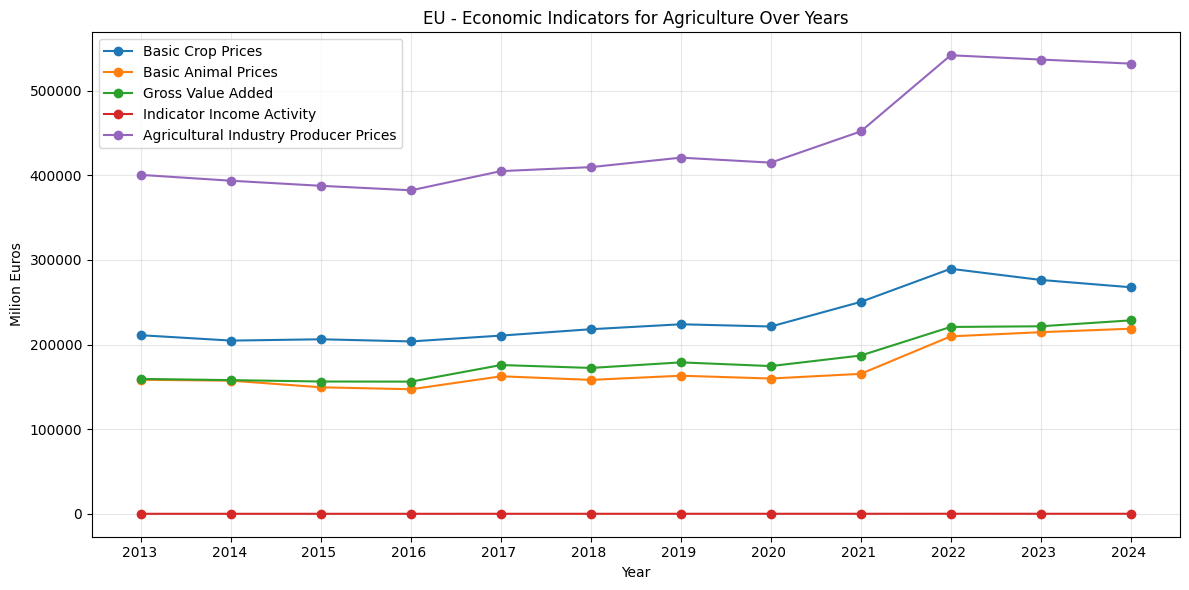

In [138]:
df_names = ['Basic Crop Prices', 'Basic Animal Prices', 'Gross Value Added',
            'Indicator Income Activity', 'Agricultural Industry Producer Prices']

plt.figure(figsize=(12, 6))

for df, name in zip(all_df, df_names):
    eu_data = df[df['Country'] == 'European Union (27 countries)']
    if not eu_data.empty:

        years = [col for col in df.columns if col != 'Country']
        values = eu_data.iloc[0][years].values
        
        plt.plot(years, values, marker='o', label=name)

plt.title('EU - Economic Indicators for Agriculture Over Years')
plt.xlabel('Year')
plt.ylabel('Milion Euros')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Economic Accounts for Agriculture in Austria - Normalized

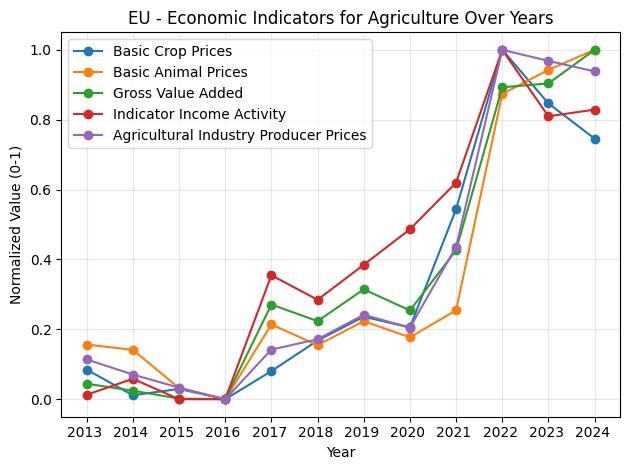

In [140]:
for df, name in zip(all_df, df_names):
    eu_data = df[df['Country'] == 'European Union (27 countries)']
    
    if not eu_data.empty:
        years = [col for col in df.columns if col != 'Country']
        values = []
        valid_years = []
        
        for year in years:
            val = eu_data.iloc[0][year]
            try:
                values.append(float(val))
                valid_years.append(year)
            except:
                continue
        
        if len(values) > 1:
            values = np.array(values)
            normalized = (values - values.min()) / (values.max() - values.min())
            plt.plot(valid_years, normalized, marker='o', label=name)

plt.title('EU - Economic Indicators for Agriculture Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()